<a href="https://colab.research.google.com/github/Nkoyoasuz/A-Linear-Regression-Model/blob/main/A_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [588]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [589]:
df = pd.read_csv('/content/drive/MyDrive/crib (1).csv')

In [590]:
df.head()

,Property Ref,Added On,Last Updated,Market Status,Type,Bedrooms,Bathrooms,Toilets,Parking Spaces,Furnishing,Price,District,State,Servicing,Service Charge,Total Area,Covered Area
0,2619053,13 Dec 2024,27 Mar 2025,Available,House,3.0,3.0,4.0,1.0,Furnished,110000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
1,2674076,21 Jan 2025,15 Apr 2025,Available,Terraced Duplex,4.0,4.0,5.0,3.0,NaN,530000000.0,Victoria Island (VI),Lagos,Serviced,NaN,NaN,NaN
2,2820608,15 Apr 2025,15 Apr 2025,Available,Semi-detached Duplex,5.0,7.0,6.0,4.0,NaN,850000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
3,2820575,15 Apr 2025,15 Apr 2025,Available,Detached Duplex,5.0,5.0,6.0,5.0,NaN,450000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
4,2790291,27 Mar 2025,15 Apr 2025,Available,Detached Duplex,4.0,4.0,5.0,3.0,NaN,250000000.0,Lekki,Lagos,Serviced,NaN,NaN,NaN


In [591]:
df.shape

(10157, 17)

In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10157 entries, 0 to 10156
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Property Ref    10157 non-null  int64  
 1   Added On        10157 non-null  object 
 2   Last Updated    10157 non-null  object 
 3   Market Status   10157 non-null  object 
 4   Type            10157 non-null  object 
 5   Bedrooms        10061 non-null  float64
 6   Bathrooms       9089 non-null   float64
 7   Toilets         9297 non-null   float64
 8   Parking Spaces  5705 non-null   float64
 9   Furnishing      756 non-null    object 
 10  Price           10157 non-null  float64
 11  District        10157 non-null  object 
 12  State           10157 non-null  object 
 13  Servicing       744 non-null    object 
 14  Service Charge  119 non-null    object 
 15  Total Area      2086 non-null   object 
 16  Covered Area    1636 non-null   object 
dtypes: float64(5), int64(1), object

In [593]:
df1 = df.copy()

In [594]:
df['Property Ref'].duplicated().sum()

np.int64(6269)

In [595]:
df.duplicated().sum()

np.int64(5253)

In [596]:
df['Property Ref'].duplicated()

,Property Ref
0,False
1,False
2,False
3,False
4,False
...,...
10152,False
10153,False
10154,False
10155,False


In [597]:
duplicated_property_ref_rows = df[df['Property Ref'].duplicated()]
display(duplicated_property_ref_rows)

,Property Ref,Added On,Last Updated,Market Status,Type,Bedrooms,Bathrooms,Toilets,Parking Spaces,Furnishing,Price,District,State,Servicing,Service Charge,Total Area,Covered Area
43,2820538,15 Apr 2025,15 Apr 2025,Available,Semi-detached Duplex,4.0,4.0,5.0,NaN,NaN,200000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
44,2820535,15 Apr 2025,15 Apr 2025,Available,Terraced Duplex,4.0,4.0,5.0,NaN,NaN,270000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
47,2816092,12 Apr 2025,15 Apr 2025,Available,Semi-detached Duplex,4.0,4.0,5.0,2.0,NaN,280000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
48,2820530,15 Apr 2025,15 Apr 2025,Available,Semi-detached Duplex,5.0,5.0,5.0,3.0,NaN,140000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
49,2820508,15 Apr 2025,15 Apr 2025,Available,Detached Duplex,4.0,4.0,5.0,4.0,NaN,180000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10067,2628166,20 Dec 2024,07 May 2025,Available,Detached Duplex,4.0,4.0,5.0,3.0,NaN,950000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
10088,2726019,18 Feb 2025,22 Apr 2025,Available,Detached Duplex,5.0,5.0,6.0,NaN,NaN,400000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
10109,1863506,13 Aug 2023,11 May 2025,Available,Detached Duplex,5.0,5.0,6.0,4.0,NaN,330000000.0,Lekki,Lagos,NaN,NaN,346 sqm,NaN
10130,1788604,24 Jun 2023,18 Apr 2025,Available,Semi-detached Duplex,5.0,6.0,7.0,5.0,Furnished,260000000.0,Ajah,Lagos,NaN,NaN,500 sqm,250 sqm


In [598]:
df[df['Property Ref'] == 2820538]

,Property Ref,Added On,Last Updated,Market Status,Type,Bedrooms,Bathrooms,Toilets,Parking Spaces,Furnishing,Price,District,State,Servicing,Service Charge,Total Area,Covered Area
23,2820538,15 Apr 2025,15 Apr 2025,Available,Semi-detached Duplex,4.0,4.0,5.0,NaN,NaN,200000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
43,2820538,15 Apr 2025,15 Apr 2025,Available,Semi-detached Duplex,4.0,4.0,5.0,NaN,NaN,200000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
1317,2820538,15 Apr 2025,15 Apr 2025,Available,Semi-detached Duplex,4.0,4.0,5.0,NaN,NaN,200000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
8455,2820538,15 Apr 2025,15 Apr 2025,Available,Semi-detached Duplex,4.0,4.0,5.0,NaN,NaN,200000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
9245,2820538,15 Apr 2025,15 Apr 2025,Available,Semi-detached Duplex,4.0,4.0,5.0,NaN,NaN,200000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN


In [599]:
df[df['Property Ref'] == 2816092]

,Property Ref,Added On,Last Updated,Market Status,Type,Bedrooms,Bathrooms,Toilets,Parking Spaces,Furnishing,Price,District,State,Servicing,Service Charge,Total Area,Covered Area
25,2816092,12 Apr 2025,15 Apr 2025,Available,Semi-detached Duplex,4.0,4.0,5.0,2.0,NaN,280000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
47,2816092,12 Apr 2025,15 Apr 2025,Available,Semi-detached Duplex,4.0,4.0,5.0,2.0,NaN,280000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
1324,2816092,12 Apr 2025,15 Apr 2025,Available,Semi-detached Duplex,4.0,4.0,5.0,2.0,NaN,280000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
8452,2816092,12 Apr 2025,08 May 2025,Available,Semi-detached Duplex,4.0,4.0,5.0,2.0,NaN,280000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
9243,2816092,12 Apr 2025,08 May 2025,Available,Semi-detached Duplex,4.0,4.0,5.0,2.0,NaN,280000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN


In [600]:
len(df.index)

10157

In [601]:
df.drop_duplicates(subset=['Property Ref'], inplace=True)
len(df.index)

3888

In [602]:
df.duplicated().sum()

np.int64(0)

In [603]:
df.isnull().sum()

,0
Property Ref,0
Added On,0
Last Updated,0
Market Status,0
Type,0
Bedrooms,48
Bathrooms,419
Toilets,338
Parking Spaces,1755
Furnishing,3591


In [604]:
df.drop(columns=['Furnishing','Servicing','Service Charge','Total Area','Covered Area'], inplace=True)

In [605]:
df.columns

Index(['Property Ref', 'Added On', 'Last Updated', 'Market Status', 'Type',
       'Bedrooms', 'Bathrooms', 'Toilets', 'Parking Spaces', 'Price',
       'District', 'State'],
      dtype='object')

In [606]:
df.isnull().sum()

,0
Property Ref,0
Added On,0
Last Updated,0
Market Status,0
Type,0
Bedrooms,48
Bathrooms,419
Toilets,338
Parking Spaces,1755
Price,0


In [607]:
(df.isnull().sum() / len(df)) * 100

,0
Property Ref,0.000000
Added On,0.000000
Last Updated,0.000000
Market Status,0.000000
Type,0.000000
Bedrooms,1.234568
Bathrooms,10.776749
Toilets,8.693416
Parking Spaces,45.138889
Price,0.000000


In [608]:
df['Bedrooms'].mean()

np.float64(4.394791666666666)

In [609]:
median_bedrooms = df['Bedrooms'].median()
median_bedrooms

4.0

In [610]:
df['Bedrooms'].isna().sum()

np.int64(48)

In [611]:
df.fillna({'Bedrooms':median_bedrooms}, inplace=True)

In [612]:
df['Bedrooms'].isna().sum()

np.int64(0)

In [613]:
# Fill nulls in 'Bathrooms' and 'Toilets' based on 'Bedrooms'
df['Bathrooms'] = df.apply(lambda row: row['Bedrooms'] if pd.isna(row['Bathrooms']) else row['Bathrooms'], axis=1)
df['Toilets'] = df.apply(lambda row: row['Bedrooms'] if pd.isna(row['Toilets']) else row['Toilets'], axis=1)

In [614]:
df.isnull().sum()

,0
Property Ref,0
Added On,0
Last Updated,0
Market Status,0
Type,0
Bedrooms,0
Bathrooms,0
Toilets,0
Parking Spaces,1755
Price,0


In [615]:
df[df['Parking Spaces'].isnull()]

,Property Ref,Added On,Last Updated,Market Status,Type,Bedrooms,Bathrooms,Toilets,Parking Spaces,Price,District,State
5,2820596,15 Apr 2025,15 Apr 2025,Available,Detached Duplex,5.0,5.0,6.0,NaN,3.500000e+08,Lekki,Lagos
6,2820573,15 Apr 2025,15 Apr 2025,Available,Detached Duplex,4.0,4.0,5.0,NaN,5.000000e+08,Lekki,Lagos
7,2820611,15 Apr 2025,15 Apr 2025,Available,Terraced Duplex,4.0,4.0,5.0,NaN,3.000000e+08,Lekki,Lagos
8,2820598,15 Apr 2025,15 Apr 2025,Available,Detached Duplex,4.0,4.0,5.0,NaN,5.000000e+08,Lekki,Lagos
9,2820591,15 Apr 2025,15 Apr 2025,Available,Block of Flats,2.0,2.0,3.0,NaN,7.300000e+07,Lekki,Lagos
...,...,...,...,...,...,...,...,...,...,...,...,...
10149,2752501,05 Mar 2025,13 May 2025,Available,Detached Duplex,6.0,6.0,6.0,NaN,3.400000e+09,Maitama District,Abuja
10152,2806998,07 Apr 2025,09 May 2025,Available,House,2.0,4.0,4.0,NaN,1.800000e+08,Lekki,Lagos
10153,2807023,07 Apr 2025,08 May 2025,Available,Terraced Duplex,4.0,4.0,5.0,NaN,3.000000e+08,Lekki,Lagos
10155,2776147,19 Mar 2025,24 Apr 2025,Available,Block of Flats,111.0,111.0,112.0,NaN,2.500000e+09,Katampe,Abuja


In [616]:
df['Parking Spaces'].mean()

np.float64(6.170182841068917)

In [617]:
df['Parking Spaces'].median()

4.0

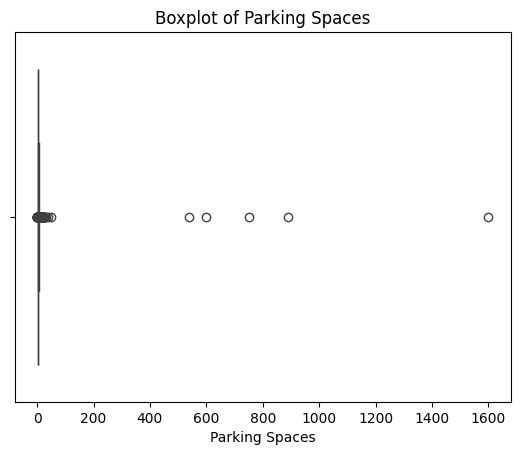

In [618]:
sns.boxplot(x=df['Parking Spaces'])
plt.title('Boxplot of Parking Spaces')
plt.xlabel('Parking Spaces')
plt.show()

In [619]:
df[df['Parking Spaces'] > 20]

,Property Ref,Added On,Last Updated,Market Status,Type,Bedrooms,Bathrooms,Toilets,Parking Spaces,Price,District,State
272,2597866,29 Nov 2024,15 Apr 2025,Available,Detached Duplex,6.0,6.0,8.0,25.0,1.043594e+10,Ikoyi,Lagos
955,2513868,14 Oct 2024,14 Apr 2025,Available,Detached Duplex,5.0,6.0,5.0,540.0,1.800000e+08,Ajah,Lagos
1143,2281559,30 May 2024,08 Apr 2025,Available,Block of Flats,3.0,3.0,3.0,32.0,4.000000e+09,Victoria Island (VI),Lagos
1181,2821164,15 Apr 2025,15 Apr 2025,Available,Detached Duplex,6.0,6.0,7.0,889.0,9.500000e+08,Lekki,Lagos
1243,2820918,15 Apr 2025,16 Apr 2025,Available,Detached Duplex,4.0,4.0,5.0,750.0,2.500000e+08,Lokogoma District,Abuja
2016,2823654,16 Apr 2025,19 Apr 2025,Available,Detached Duplex,5.0,5.0,6.0,600.0,1.200000e+09,Lekki,Lagos
2038,2823560,16 Apr 2025,18 Apr 2025,Available,Block of Flats,4.0,4.0,5.0,40.0,4.011759e+10,Ikoyi,Lagos
2352,2540558,29 Oct 2024,13 Apr 2025,Available,Semi-detached Duplex,28.0,28.0,28.0,50.0,2.800000e+09,Ajah,Lagos
3100,1775882,14 Jun 2023,19 Apr 2025,Available,Block of Flats,3.0,3.0,4.0,1600.0,5.500000e+09,Ikeja,Lagos
3411,2827335,18 Apr 2025,18 Apr 2025,Available,Detached Duplex,5.0,5.0,5.0,29.0,6.000000e+08,Ajah,Lagos


In [620]:
df[df['Bathrooms'] > 20]

,Property Ref,Added On,Last Updated,Market Status,Type,Bedrooms,Bathrooms,Toilets,Parking Spaces,Price,District,State
452,2819493,14 Apr 2025,14 Apr 2025,Available,Block of Flats,18.0,27.0,27.0,NaN,3.500000e+08,Ibafo,Ogun
525,2819237,14 Apr 2025,14 Apr 2025,Available,House,10.0,22.0,22.0,12.0,7.500000e+09,Ikeja,Lagos
587,2782855,22 Mar 2025,02 Apr 2025,Available,Block of Flats,40.0,40.0,46.0,15.0,4.500000e+09,Wuse,Abuja
953,2778343,20 Mar 2025,14 Apr 2025,Available,Block of Flats,24.0,23.0,24.0,NaN,4.500000e+08,Maryland,Lagos
1012,2813147,10 Apr 2025,15 Apr 2025,Available,Semi-detached Duplex,24.0,30.0,30.0,18.0,3.500000e+09,Asokoro District,Abuja
2352,2540558,29 Oct 2024,13 Apr 2025,Available,Semi-detached Duplex,28.0,28.0,28.0,50.0,2.800000e+09,Ajah,Lagos
3124,2827989,19 Apr 2025,19 Apr 2025,Available,Block of Flats,18.0,27.0,27.0,18.0,3.200000e+08,Port Harcourt,Rivers
3462,2709476,08 Feb 2025,10 Feb 2025,Available,Block of Flats,21.0,21.0,21.0,10.0,4.000000e+08,Ikeja,Lagos
5475,2829871,21 Apr 2025,21 Apr 2025,Available,House,51.0,51.0,68.0,NaN,9.500000e+08,Lugbe District,Abuja
8175,1934443,27 Sep 2023,08 May 2025,Available,Block of Flats,24.0,24.0,24.0,NaN,7.000000e+07,Ajah,Lagos


In [621]:
df['Parking Spaces'] = df.apply(lambda row: 20 if (row['Parking Spaces'] > 20) else row['Parking Spaces'], axis=1)

In [622]:
df[df['Parking Spaces'] > 19]

,Property Ref,Added On,Last Updated,Market Status,Type,Bedrooms,Bathrooms,Toilets,Parking Spaces,Price,District,State
11,2820576,15 Apr 2025,15 Apr 2025,Available,Detached Duplex,6.0,6.0,7.0,20.0,3.532165e+10,Ikoyi,Lagos
272,2597866,29 Nov 2024,15 Apr 2025,Available,Detached Duplex,6.0,6.0,8.0,20.0,1.043594e+10,Ikoyi,Lagos
926,2820924,15 Apr 2025,15 Apr 2025,Available,Detached Duplex,5.0,5.0,6.0,20.0,1.000000e+09,Awka,Anambra
955,2513868,14 Oct 2024,14 Apr 2025,Available,Detached Duplex,5.0,6.0,5.0,20.0,1.800000e+08,Ajah,Lagos
963,2698454,03 Feb 2025,14 Apr 2025,Available,Detached Duplex,6.0,6.0,8.0,20.0,2.500000e+09,Lekki,Lagos
1143,2281559,30 May 2024,08 Apr 2025,Available,Block of Flats,3.0,3.0,3.0,20.0,4.000000e+09,Victoria Island (VI),Lagos
1181,2821164,15 Apr 2025,15 Apr 2025,Available,Detached Duplex,6.0,6.0,7.0,20.0,9.500000e+08,Lekki,Lagos
1243,2820918,15 Apr 2025,16 Apr 2025,Available,Detached Duplex,4.0,4.0,5.0,20.0,2.500000e+08,Lokogoma District,Abuja
2016,2823654,16 Apr 2025,19 Apr 2025,Available,Detached Duplex,5.0,5.0,6.0,20.0,1.200000e+09,Lekki,Lagos
2038,2823560,16 Apr 2025,18 Apr 2025,Available,Block of Flats,4.0,4.0,5.0,20.0,4.011759e+10,Ikoyi,Lagos


In [623]:
median_parking_space = df['Parking Spaces'].median()

In [624]:
median_parking_space

4.0

In [625]:
df['Parking Spaces'].isnull().sum()

np.int64(1755)

In [626]:
df.fillna({'Parking Spaces':median_parking_space}, inplace=True)

In [627]:
df.isnull().sum()

,0
Property Ref,0
Added On,0
Last Updated,0
Market Status,0
Type,0
Bedrooms,0
Bathrooms,0
Toilets,0
Parking Spaces,0
Price,0


In [628]:
df.columns

Index(['Property Ref', 'Added On', 'Last Updated', 'Market Status', 'Type',
       'Bedrooms', 'Bathrooms', 'Toilets', 'Parking Spaces', 'Price',
       'District', 'State'],
      dtype='object')

In [629]:
df.drop(columns=['Property Ref','Added On','Last Updated'], inplace=True)

In [630]:
df.columns

Index(['Market Status', 'Type', 'Bedrooms', 'Bathrooms', 'Toilets',
       'Parking Spaces', 'Price', 'District', 'State'],
      dtype='object')

In [631]:
len(df.columns)

9

In [632]:
df.head()

,Market Status,Type,Bedrooms,Bathrooms,Toilets,Parking Spaces,Price,District,State
0,Available,House,3.0,3.0,4.0,1.0,110000000.0,Lekki,Lagos
1,Available,Terraced Duplex,4.0,4.0,5.0,3.0,530000000.0,Victoria Island (VI),Lagos
2,Available,Semi-detached Duplex,5.0,7.0,6.0,4.0,850000000.0,Lekki,Lagos
3,Available,Detached Duplex,5.0,5.0,6.0,5.0,450000000.0,Lekki,Lagos
4,Available,Detached Duplex,4.0,4.0,5.0,3.0,250000000.0,Lekki,Lagos


In [633]:
df['Market Status'].value_counts()

,count
Market Status,
Available,3884
Not Available,4


In [634]:
df['State'].value_counts()

,count
State,
Lagos,3288
Abuja,420
Oyo,53
Ogun,30
Rivers,27
Enugu,27
Delta,10
Imo,8
Akwa Ibom,8


In [635]:
df['District'].value_counts()

,count
District,
Lekki,1792
Ajah,481
Ikeja,297
Ikoyi,206
Magodo,112
...,...
Makurdi,1
Mowe Town,1
Gudu,1


In [636]:
df.head()

,Market Status,Type,Bedrooms,Bathrooms,Toilets,Parking Spaces,Price,District,State
0,Available,House,3.0,3.0,4.0,1.0,110000000.0,Lekki,Lagos
1,Available,Terraced Duplex,4.0,4.0,5.0,3.0,530000000.0,Victoria Island (VI),Lagos
2,Available,Semi-detached Duplex,5.0,7.0,6.0,4.0,850000000.0,Lekki,Lagos
3,Available,Detached Duplex,5.0,5.0,6.0,5.0,450000000.0,Lekki,Lagos
4,Available,Detached Duplex,4.0,4.0,5.0,3.0,250000000.0,Lekki,Lagos


In [637]:
# Get value counts for each column
type_counts = df['Type'].value_counts()
district_counts = df['District'].value_counts()
state_counts = df['State'].value_counts()

# Identify values that appear more than once
type_to_keep = type_counts[type_counts > 1].index
district_to_keep = district_counts[district_counts > 1].index
state_to_keep = state_counts[state_counts > 1].index

# Filter the DataFrame
df = df[df['Type'].isin(type_to_keep)]
df = df[df['District'].isin(district_to_keep)]
df = df[df['State'].isin(state_to_keep)]

In [638]:
len(df.index)

3865

In [639]:
df['Type'].value_counts()

,count
Type,
Detached Duplex,1751
Terraced Duplex,732
Semi-detached Duplex,721
Block of Flats,308
House,263
Detached Bungalow,74
Semi-detached Bungalow,16


In [642]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# One-Hot Encoding for 'Market Status' and 'Type'
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Use sparse_output=False
encoded_market_type = onehot_encoder.fit_transform(df[['Market Status', 'Type']])

# Create a DataFrame from the one-hot encoded data
encoded_market_type_df = pd.DataFrame(encoded_market_type, columns=onehot_encoder.get_feature_names_out(['Market Status', 'Type']), index=df.index)

# Ordinal Encoding for 'District' and 'State'
ordinal_encoder = OrdinalEncoder()
encoded_district_state = ordinal_encoder.fit_transform(df[['District', 'State']])

# Create a DataFrame from the ordinal encoded data
encoded_district_state_df = pd.DataFrame(encoded_district_state, columns=['District_encoded', 'State_encoded'], index=df.index)

# Drop the original columns and concatenate the encoded columns
df = df.drop(['Market Status', 'Type', 'District', 'State'], axis=1)
df = pd.concat([df, encoded_market_type_df, encoded_district_state_df], axis=1)

KeyError: "None of [Index(['Market Status', 'Type'], dtype='object')] are in the [columns]"

In [643]:
df.head()

,Bedrooms,Bathrooms,Toilets,Parking Spaces,Price,Market Status_Available,Market Status_Not Available,Type_Block of Flats,Type_Detached Bungalow,Type_Detached Duplex,Type_House,Type_Semi-detached Bungalow,Type_Semi-detached Duplex,Type_Terraced Duplex,District_encoded,State_encoded
0,3.0,3.0,4.0,1.0,110000000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,48.0,7.0
1,4.0,4.0,5.0,3.0,530000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,72.0,7.0
2,5.0,7.0,6.0,4.0,850000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,48.0,7.0
3,5.0,5.0,6.0,5.0,450000000.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0,7.0
4,4.0,4.0,5.0,3.0,250000000.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0,7.0


In [644]:
df.shape

(3865, 16)

In [645]:
X = df.drop('Price', axis=1)
y = df['Price']

In [646]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [647]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [648]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model instance
model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4.2063725794084835e+22
R-squared: -0.0017224860753564109
